In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import datetime
import pickle

In [2]:
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

In [3]:
with open(f'eb1_fa_till2020.pk', 'rb') as f:
    eb_fa = pickle.load(f)

In [4]:
x_date = []
M=['january','february','march','april','may','june','july','august','september','october','november','december']
M_abbr = [a[:3].upper() for a in M]

for yr in [2016, 2017, 2018, 2019, 2020]:
    bd, ed = 0, 12
    if yr==2016:
        bd = 9
    if yr==2020:
        ed=1
    for i in range(bd, ed):
        m = M[i]
        fy = yr if i<9 else yr+1
        d = datetime.date(yr, i+1, 1)
        x_date.append(d)

In [5]:
y=[166,91,92,104,121,92,94,90,8,2,6,3,169,113,109,98,67,59,3,5,2,1,2,2,28,27,22,22,42,33,40,17,6,120,10,3,5,4,18,9]

In [6]:
y_cp = [0,0,0,0,0,70,56,99,0,0,0,0,386,245,287,206,214,119,1,0,0,0,0,0,30,56,40,104,68,59,59,45,33,84,17,1,16,29,36,0]

In [7]:
len(y_cp)

40

Text(0.5, 1.0, 'Reported China-born EB1 issued number in mitbbs')

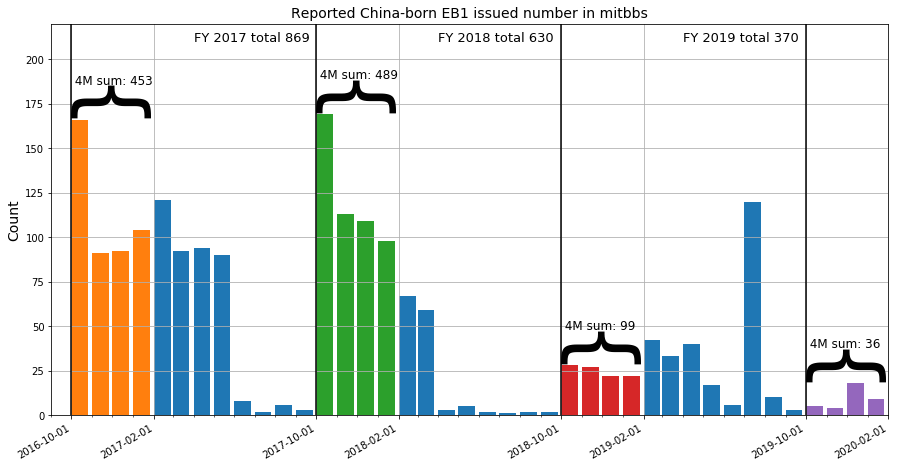

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
ax.bar(x_date, y, 25, align='edge')

sd = 4
for i in [0,12,24,36]:
    ax.bar(x_date[i:i+sd], y[i:i+sd], 25, align='edge')
    x = x_date[i]
    tmp_y = sum(y[i:i+sd])
    text_y = max(y[i:i+sd])+5
    ax.text(x,text_y+15,f' 4M sum: {tmp_y}',fontsize=12)
    ax.annotate(r"$\}$",fontsize=85,rotation=90,
            xy=(x, text_y)) #, xycoords='figure fraction'

    ax.plot([x_date[i],x_date[i]],[0,220],color='black')
    if i<36:
        tmp_y = sum(y[i:i+12])
        ax.text(x_date[i+6], 210, f'FY {i//12+2017} total {tmp_y}',fontsize=13)
    
ax.xaxis.set_major_locator(years)
# ax.xaxis.set_major_formatter(years_fmt)
ax.set_xlim([datetime.date(2016,9,1),datetime.date(2020,2,1)])
ax.set_ylim([0,220])
ax.set_xticks([datetime.date(2016,10,1),datetime.date(2017,2,1),
               datetime.date(2017,10,1),datetime.date(2018,2,1),
               datetime.date(2018,10,1),datetime.date(2019,2,1),
               datetime.date(2019,10,1),datetime.date(2020,2,1)])
ax.xaxis.set_minor_locator(months)
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.grid(True)

ax.set_ylabel('Count', fontsize=14)
fig.autofmt_xdate()

ax.set_title('Reported China-born EB1 issued number in mitbbs',fontsize=14)

Text(0.5, 1.0, 'Number of China-born EB1 issued by DOS (CP)')

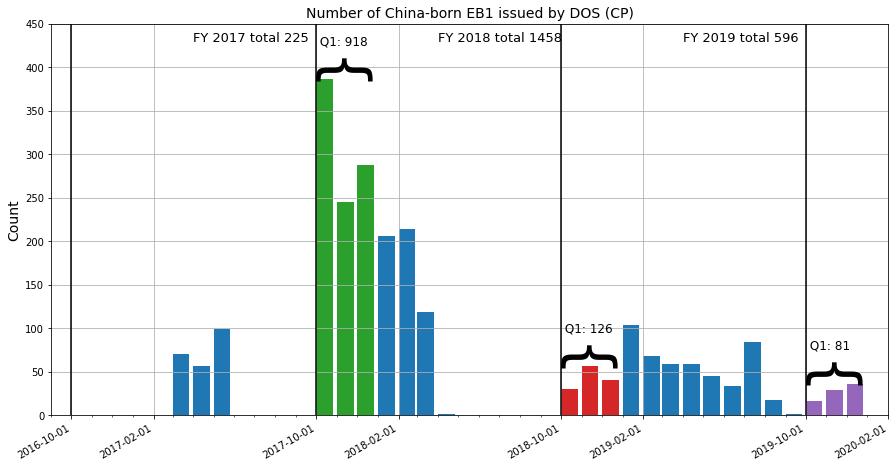

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
ax.bar(x_date, y_cp, 25, align='edge')

sd = 3
for i in [0,12,24,36]:
    ax.bar(x_date[i:i+sd], y_cp[i:i+sd], 25, align='edge')
    x = x_date[i]
    tmp_y = sum(y_cp[i:i+sd])
    text_y = max(y_cp[i:i+sd])+5
    if i>0:
        ax.text(x,text_y+35,f' Q1: {tmp_y}',fontsize=12)
        ax.annotate(r"$\}$",fontsize=60,rotation=90,
                xy=(x, text_y)) #, xycoords='figure fraction'

    ax.plot([x_date[i],x_date[i]],[0,450],color='black')
    if i<36:
        tmp_y = sum(y_cp[i:i+12])
        ax.text(x_date[i+6], 430, f'FY {i//12+2017} total {tmp_y}',fontsize=13)
    
ax.xaxis.set_major_locator(years)
# ax.xaxis.set_major_formatter(years_fmt)
ax.set_xlim([datetime.date(2016,9,1),datetime.date(2020,2,1)])
ax.set_ylim([0,450])
ax.set_xticks([datetime.date(2016,10,1),datetime.date(2017,2,1),
               datetime.date(2017,10,1),datetime.date(2018,2,1),
               datetime.date(2018,10,1),datetime.date(2019,2,1),
               datetime.date(2019,10,1),datetime.date(2020,2,1)])
ax.xaxis.set_minor_locator(months)
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.grid(True)

ax.set_ylabel('Count', fontsize=14)
fig.autofmt_xdate()

ax.set_title('Number of China-born EB1 issued by DOS (CP)',fontsize=14)